In [1]:
import main as main

In [2]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from db import dbctrl as dbc
import string
from wordcloud import WordCloud
import re

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [5]:
# main.run_all()

'Program has sucessfully scraped and saved the data.'

In [21]:
### Washington, DC news scraper
wdc_fox = urlopen('https://www.fox5dc.com/')
wdc_soup = BeautifulSoup(wdc_fox, 'html.parser')
articles = wdc_soup.find_all('article')

titles = []

for i in articles:
    print(re.sub('\d\d\shours\sago','',i.text).rstrip().lstrip())

'Trump Train' takes over Beltway traffic around nation's capital
Photos show people of interest after 7 people shot at College Park Halloween hotel party, police say
Four shot, two dead at house party in Prince William County
Fairfax County police investigating double homicide in Centreville home
Teenage boy killed in Southeast DC shooting
Texas Supreme Court denies GOP effort to reject Houston votes
Texas events canceled after 'Trump train' surrounds Biden campaign bus on interstate
Tropical Storm Eta forms in Atlantic, ties record for most named storms in a season
US reports nearly 100,000 COVID-19 cases, breaking new single-day record  1 day ago
2020 election: Here are the House races to watch  1 day ago
Rare Halloween 'blue moon' will light up the sky tonight  1 day ago
Space station will mark 20 years of people living in orbit  1 day ago
Lawyer: Mom, child trapped in crowd when police smashed car  2 days ago
video  'Trump Train' takes over Beltway traffic around nation's capital
v

In [13]:
al_data = urlopen('https://www.al.com/')
al_soup = BeautifulSoup(al_data, 'html.parser')
articles = al_soup.find_all('article')
# regex_pattern = r'\dh\sago'
titles = []
    
for i in articles:
    titles.append(i.text)
    
titles = [re.sub('\d+h\sago$', '',i).lstrip().rstrip() for i in titles]    
titles = [i for i in set(titles)]

In [4]:
titles = dbc.grab_titles()

In [5]:
titles = [re.sub("\dh$", '', i) for i in titles]

In [7]:
stop_words = set(stopwords.words('english')) | set(string.punctuation)

In [8]:
cleaned_titles = []
for i in titles:
    word_tokens = word_tokenize(i)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
            
    cleaned_titles.append(filtered_sentence)

In [9]:
cleaned_words = []
for titles in cleaned_titles:
    for words in titles:
        cleaned_words.append(re.sub(r'\dh','', words))

In [10]:
listToStr = ' '.join([str(elem) for elem in cleaned_words])

In [11]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(listToStr)

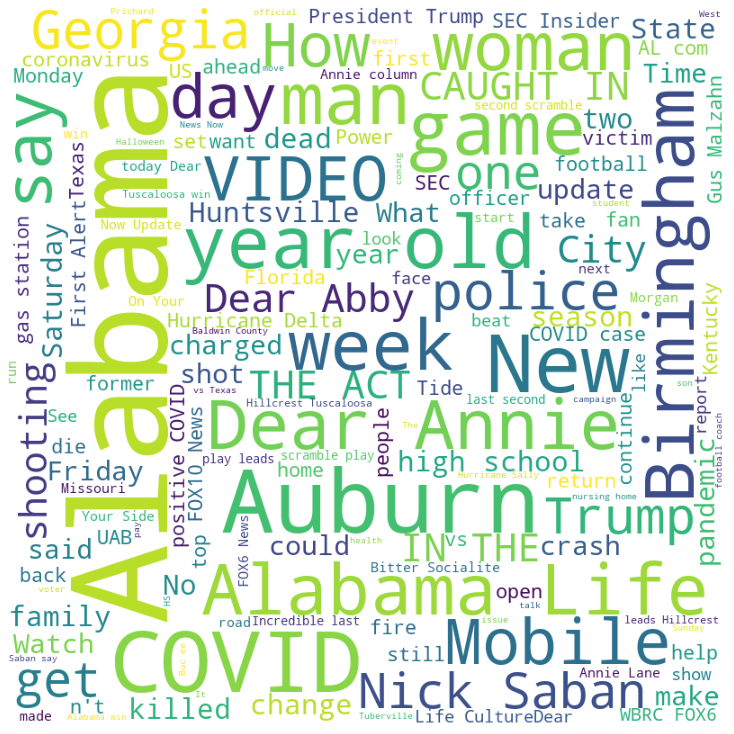

In [12]:
plt.figure(figsize = (20, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Observing the Data that we have collected

In [72]:
meta_alabama = 0
alabama_titles = []
football_count = 0
football_titles = []
covid_count = 0
covid_titles = []
trump_count = 0
trump_titles = []
saban_count = 0
saban_titles = []
police_count = 0
police_titles = []
crime_count = 0
crime_titles = []
misc_titles = []
for i in set(all_titles):
    if 'Alabama' in i:
        meta_alabama +=1
        alabama_titles.append(i)
    elif 'football' in i:
        football_count += 1
        football_titles.append(i)
    elif 'Trump' in i:
        trump_count += 1
        trump_titles.append(i)
    elif 'Saban' in i:
        saban_count += 1
        saban_titles.append(i)
    elif 'police' in i:
        police_count += 1
        police_titles.append(i)
    else:
        misc_titles.append(i)

In [66]:
len(set(all_titles))

2085

In [73]:
meta_alabama

351

In [74]:
football_count

50

In [75]:
saban_count

28

In [76]:
trump_count

93

In [77]:
police_count

44

In [61]:
### There will be a few list that will make up the entire sports spectrum
### For example, there will be football words, baseball words, basketball words, etc.

# football_positions = ['QB','RB','FB','WR','OT','C','G','TE','DE','DT', 'LB', 'OLB', 'S', 'CB', 'FS']

# football_words = ['Saban', 'ESPN', 'Alabama football', 'Tide', 'Tide', 'football', 'NFL', 'Auburn football',
#                  'Nick Saban', 'cornerback', 'vs.', 'players', 'games', 'College Football']

# crime_words = ['murder', 'shooting', 'killed', 'dead', 'injured', 'homicide', 'gunfire', 'injured', 'beaten', 'death',
#               'arrested', 'abuse', 'charged']